In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from src.data.make_dataset import load_data

In [2]:
dataset_path = Path().absolute() / "../data/raw/AirlineQuotesData.xlsx" 
raw_data = load_data(dataset_path, "Flight Duplicate Quotes")


# Load Data

In [3]:
raw_data.head()

,QuoteID,UserID,QuoteCreationDateTime,FlightDate,Price,Sale_Flag
0,QUOTE_1,USER_73,2017-04-17 13:27:00,2018-01-16,480.00,0
1,QUOTE_2,USER_73,2017-04-18 15:22:00,2018-01-17,494.41,0
2,QUOTE_3,USER_66,2017-04-26 12:45:00,2018-01-09,498.61,0
3,QUOTE_4,USER_66,2017-05-01 11:42:00,2018-01-09,408.94,0
4,QUOTE_5,USER_14,2017-05-05 14:37:00,2018-03-07,893.92,0


In [4]:
raw_data.shape

(2152, 6)

There are 6 columns and 2152 rows.
The 'Sale_Flag' column is the target variable and the remaining columns are quotes each user recieved metrics where each row represents an individual company. 

Field	Description
- QuoteID:Each new quote on the website is given it's own unique identifier
- UserID: Based on the IP Address, Name, DOB etc. the airline has been able to attribue a unique user id to each visitor on to the website
- QuoteCreationDateTime: The time and date of the quote
- FlightDate: The departure date for the flight
- Price: The price of the quote in CAD
- Sale_Flag: Indicator showing if a sale was made; 1 = Yes, 0 = No

This is a supervised learning classification problem.

<Axes: xlabel='QuoteCreationDateTime', ylabel='Price'>

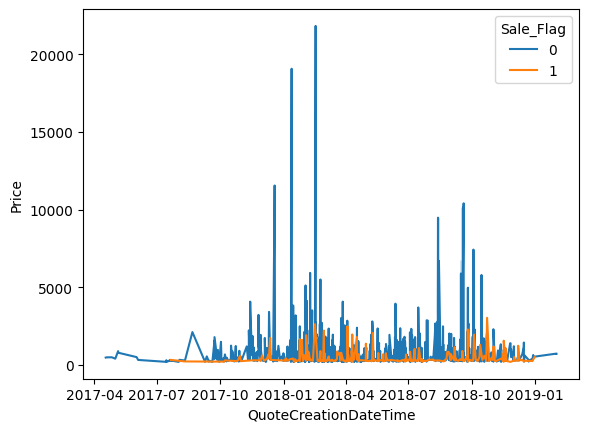

In [5]:
sns.lineplot(
    data=raw_data,
    x="QuoteCreationDateTime", y="Price", hue="Sale_Flag",
)

Seems like there are a few extremely large prices. All of which did not conclude in a sale.

In [6]:
raw_data[raw_data.Price > 5000]

,QuoteID,UserID,QuoteCreationDateTime,FlightDate,Price,Sale_Flag
200,QUOTE_201,USER_67,2017-12-18 22:11:00,2018-04-01,11560.65,0
269,QUOTE_270,USER_104,2018-01-12 14:40:00,2018-04-01,19079.51,0
466,QUOTE_467,USER_75,2018-02-01 20:20:00,2018-02-07,5125.30,0
513,QUOTE_514,USER_75,2018-02-08 11:42:00,2018-02-18,5933.75,0
591,QUOTE_592,USER_13,2018-02-16 11:40:00,2018-11-01,21838.09,0
635,QUOTE_636,USER_75,2018-02-23 10:45:00,2018-03-05,5509.75,0
1630,QUOTE_1631,USER_59,2018-08-13 06:03:00,2018-10-24,9481.64,0
1634,QUOTE_1635,USER_59,2018-08-13 06:24:00,2018-11-01,9481.64,0
1648,QUOTE_1649,USER_59,2018-08-14 13:39:00,2018-10-24,6707.46,0
1808,QUOTE_1809,USER_59,2018-09-15 13:20:00,2018-10-24,5893.38,0


Lets pick out a single user and see how many times they had a quote

In [7]:
temp = raw_data.UserID.value_counts()
temp

UserID
USER_85     34
USER_15     31
USER_105    28
USER_43     26
USER_55     25
            ..
USER_65     11
USER_137    11
USER_7      11
USER_1      11
USER_158     6
Name: count, Length: 158, dtype: int64

There are 158 users with the max number of quotes being 34 quotes and min being 6.

Based on how many quotes, did a sale occur?

In [8]:
raw_data.Sale_Flag.value_counts()

Sale_Flag
0    1854
1     298
Name: count, dtype: int64

<Axes: ylabel='count'>

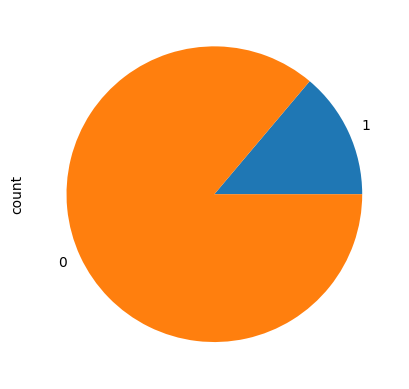

In [9]:
raw_data.Sale_Flag.value_counts().sort_values().plot(kind = 'pie')

In [10]:
val = raw_data.Sale_Flag.value_counts(normalize=True).iloc[1]

The close ratio was 13.8%

<Axes: xlabel='QuoteCreationDateTime', ylabel='FlightDate'>

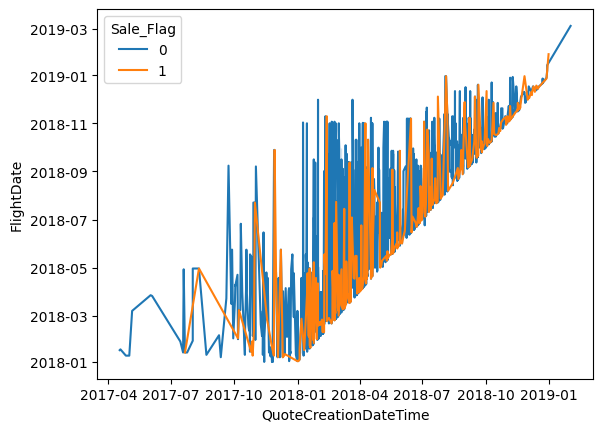

In [11]:
sns.lineplot(
    data=raw_data,
    x="QuoteCreationDateTime", y="FlightDate", hue="Sale_Flag"
)

# If this was an ML problem we may add Features:

- Days before a flight 
- Month of Flight
- Day of quote
- Quote per use leading up to current quote (cumcount)
- Number of quotes per user


QuoteID can be removed. 

In [12]:
raw_data.sort_values("QuoteCreationDateTime",inplace=True)
raw_data["DaysToFlight"] = (raw_data["FlightDate"].dt.date - raw_data["QuoteCreationDateTime"].dt.date) /pd.Timedelta(days=1)

In [13]:
raw_data["PriorNumberQuoteCount"] = raw_data.groupby("UserID").cumcount()

In [14]:
raw_data.describe()

,QuoteCreationDateTime,FlightDate,Price,Sale_Flag,DaysToFlight,PriorNumberQuoteCount
count,2152,2152,2152.000000,2152.000000,2152.000000,2152.000000
mean,2018-05-03 06:42:33.485130240,2018-07-01 00:03:20.743494400,646.422249,0.138476,59.325743,6.856413
min,2017-04-17 13:27:00,2018-01-01 00:00:00,200.090000,0.000000,-10.000000,0.000000
25%,2018-02-10 16:48:30,2018-04-10 00:00:00,277.245000,0.000000,4.000000,3.000000
50%,2018-04-12 15:00:00,2018-06-27 12:00:00,331.900000,0.000000,33.000000,6.000000
75%,2018-08-06 10:06:30,2018-09-28 06:00:00,644.810000,0.000000,91.000000,10.000000
max,2019-02-01 11:55:00,2019-03-05 00:00:00,21838.090000,1.000000,351.000000,33.000000
std,NaN,NaN,1019.969173,0.345479,68.810700,5.106246


In [15]:
raw_data[raw_data.DaysToFlight<0]

,QuoteID,UserID,QuoteCreationDateTime,FlightDate,Price,Sale_Flag,DaysToFlight,PriorNumberQuoteCount
1173,QUOTE_1174,USER_148,2018-05-04 15:14:00,2018-05-02,285.12,0,-2.0,4
1488,QUOTE_1489,USER_17,2018-07-04 13:49:00,2018-06-24,263.70,0,-10.0,17
1833,QUOTE_1834,USER_54,2018-09-17 14:22:00,2018-09-12,236.70,0,-5.0,7


Number of quotes where the flight occured before.

# Seems like there were a few outlier values.

In [16]:
raw_data.iloc[raw_data.Price.idxmax()]

QuoteID                            QUOTE_592
UserID                               USER_13
QuoteCreationDateTime    2018-02-16 11:40:00
FlightDate               2018-11-01 00:00:00
Price                               21838.09
Sale_Flag                                  0
DaysToFlight                           258.0
PriorNumberQuoteCount                      0
Name: 591, dtype: object

In [17]:
raw_data[raw_data.UserID == "USER_13"]

,QuoteID,UserID,QuoteCreationDateTime,FlightDate,Price,Sale_Flag,DaysToFlight,PriorNumberQuoteCount
591,QUOTE_592,USER_13,2018-02-16 11:40:00,2018-11-01,21838.09,0,258.0,0
592,QUOTE_593,USER_13,2018-02-16 11:52:00,2018-11-01,1346.74,0,258.0,1
603,QUOTE_604,USER_13,2018-02-19 13:18:00,2018-11-03,968.12,0,257.0,2
604,QUOTE_605,USER_13,2018-02-19 14:57:00,2018-11-03,1446.74,0,257.0,3
638,QUOTE_639,USER_13,2018-02-23 13:47:00,2018-11-03,543.89,0,253.0,4
648,QUOTE_649,USER_13,2018-02-25 10:07:00,2018-11-01,1396.74,0,249.0,5
1107,QUOTE_1108,USER_13,2018-04-18 16:39:00,2018-11-01,1018.95,0,197.0,6
1108,QUOTE_1109,USER_13,2018-04-18 21:31:00,2018-11-01,1018.95,0,197.0,7
1116,QUOTE_1117,USER_13,2018-04-19 13:21:00,2018-11-01,1522.70,0,196.0,8
1558,QUOTE_1559,USER_13,2018-07-15 12:48:00,2018-11-03,1667.77,0,111.0,9


Some prices were very large and didn't result in a sale at all.

<Axes: xlabel='DaysToFlight', ylabel='Price'>

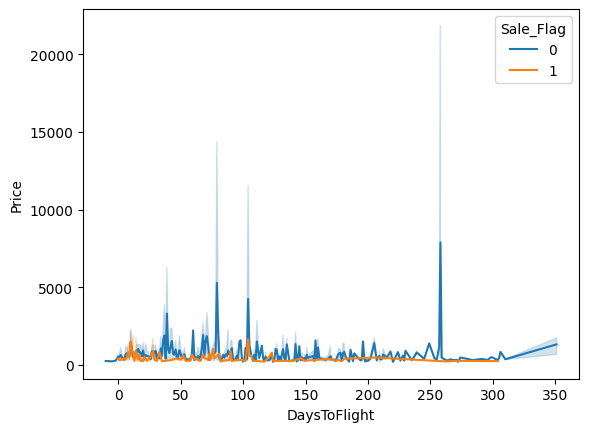

In [18]:
sns.lineplot(
    data=raw_data,
    x="DaysToFlight", y="Price", hue="Sale_Flag"
)

In [36]:
raw_data.Price.quantile(.99)

3994.540599999981

<Axes: xlabel='DaysToFlight', ylabel='Price'>

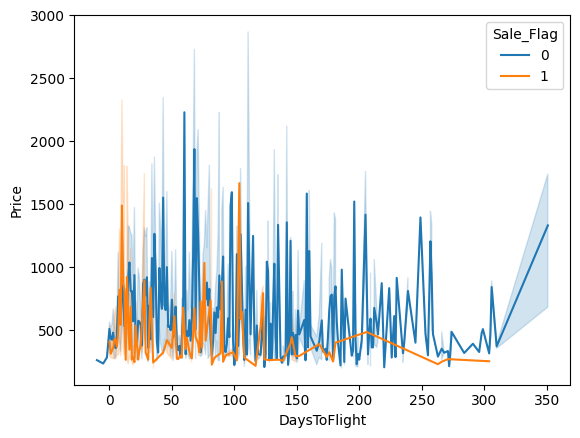

In [37]:
sns.lineplot(
    data=raw_data[raw_data.Price < 4000],
    x="DaysToFlight", y="Price", hue="Sale_Flag"
)

In [20]:
raw_data.groupby("Sale_Flag").Price.mean()

Sale_Flag
0    676.360717
1    460.160772
Name: Price, dtype: float64

Typically sale prices is smaller than non-sale price. 

I found this user interesting, because they had a large number of quotes.

In [39]:
raw_data[raw_data["UserID"] =="USER_130"]

,QuoteID,UserID,QuoteCreationDateTime,FlightDate,Price,Sale_Flag,DaysToFlight,PriorNumberQuoteCount
777,QUOTE_778,USER_130,2018-03-08 07:07:00,2018-03-08,331.9,0,0.0,0
778,QUOTE_779,USER_130,2018-03-08 07:07:00,2018-03-08,331.9,0,0.0,1
771,QUOTE_772,USER_130,2018-03-08 07:07:00,2018-03-08,331.9,0,0.0,2
780,QUOTE_781,USER_130,2018-03-08 07:07:00,2018-03-08,331.9,0,0.0,3
781,QUOTE_782,USER_130,2018-03-08 07:07:00,2018-03-08,331.9,0,0.0,4
776,QUOTE_777,USER_130,2018-03-08 07:07:00,2018-03-08,331.9,0,0.0,5
779,QUOTE_780,USER_130,2018-03-08 07:07:00,2018-03-08,331.9,0,0.0,6
775,QUOTE_776,USER_130,2018-03-08 07:07:00,2018-03-08,331.9,0,0.0,7
770,QUOTE_771,USER_130,2018-03-08 07:07:00,2018-03-08,331.9,0,0.0,8
773,QUOTE_774,USER_130,2018-03-08 07:07:00,2018-03-08,331.9,0,0.0,9
